In [6]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('Mall_Customers.csv')
Genre_values = {'Male': 1, 'Female': 0}
df['Genre']=df['Genre'].map(Genre_values)
print(df.shape)
df.dropna()
df.drop_duplicates
print(df.shape)
df.head()

(200, 5)
(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
df.dtypes

CustomerID                int64
Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

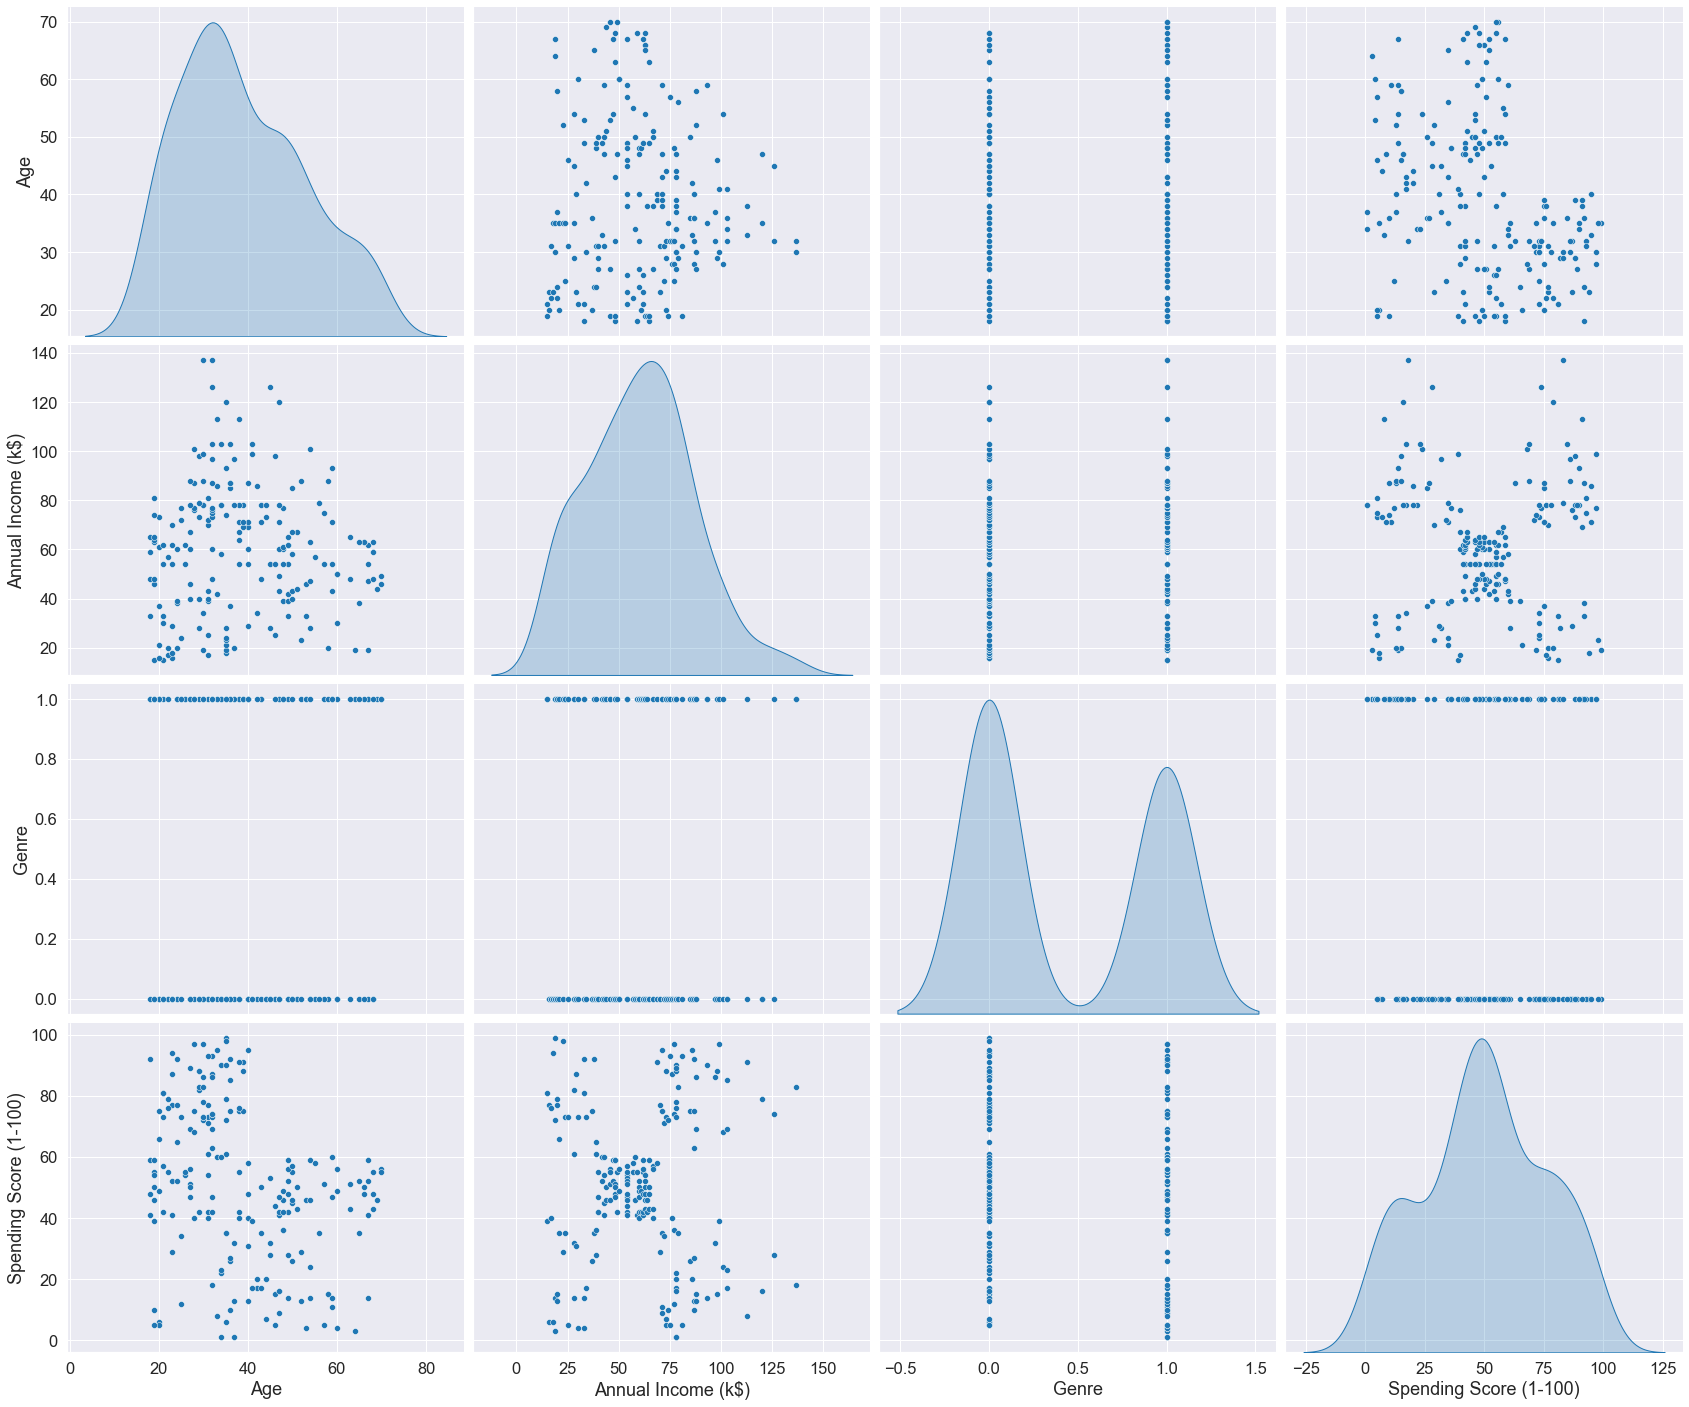

In [7]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.pairplot(df[df.columns.difference(["CustomerID"])], diag_kind='kde', height=5, aspect=6/5)

# Applying my Gradient descent algorithm

In [9]:
x=df.drop(columns=['CustomerID','Genre','Spending Score (1-100)'])
x= (x-x.mean()) / x.std()
x.insert(0,'ones',1)

y=df['Spending Score (1-100)']

x=np.matrix(x.values)

y=np.matrix(y.values)
thetas=np.matrix(np.array([1,2,3]))


In [10]:
def costF2(x2,y2,theta):
    z2=np.power(((x2 * theta.T) - y2),2)
    return np.sum(z2) / (2 * len(x2))
print(costF2(x,y,thetas))

309694.6967369731


In [11]:
def GD2(x2,y2,thetas,alpha,iters):
    temp2 = np.matrix(np.zeros(thetas.shape))
    param2= int(thetas.ravel().shape[1])
    cost2=np.zeros(iters)
    
    for i in range(iters):
        error= ((x2) * thetas.T) - y2
        
        for j in range(param2):
            term2=np.multiply(error,x2[:,j])
            temp2[0,j] = thetas[0,j] - ((alpha / len(x2)) * np.sum(term2) )
        
        thetas= temp2
        cost2[i] = costF2(x2,y2,thetas)
    return thetas ,cost2
    
alpha=0.00003
iters=1300

g ,cost = GD2(x,y,thetas,alpha,iters)
print('Theta Values is : ' ,g)

Theta Values is :  [[5.01803091e+01 9.57433413e-04 1.33526503e-03]]


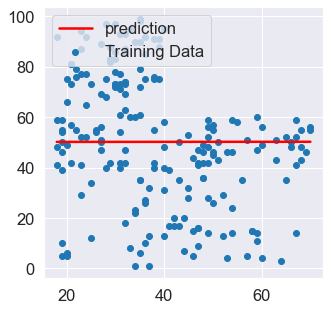

In [13]:
xlinew= np.linspace(df['Age'].min(),df['Age'].max(),100)
f= g[0,0] + (g[0,1] *xlinew)

fig,ax=plt.subplots(figsize=(5,5))
ax.plot(xlinew,f,'r',label='prediction')
ax.scatter(df['Age'][0:1000], df['Spending Score (1-100)'][0:1000],label='Training Data')
ax.legend(loc=2)

In [14]:
final_theta=g.tolist()
print(final_theta)
theta0=float(final_theta[0][0])
theta1=float(final_theta[0][1])
theta2=float(final_theta[0][2])

x_x1=df['Age']
x_x1=np.matrix(x_x1.values)

x_x2=df['Annual Income (k$)']
x_x2=np.matrix(x_x2.values)

predicted_y=theta0 + x_x1 * theta1  + x_x2 * theta2
predict_point = theta0 + 35 * theta1 + 44 * theta2
print(predict_point)

[[50.180309133884876, 0.0009574334129692499, 0.0013352650345333432]]
50.27257096485827


Text(0.5, 1.0, 'loss vs. iterations')

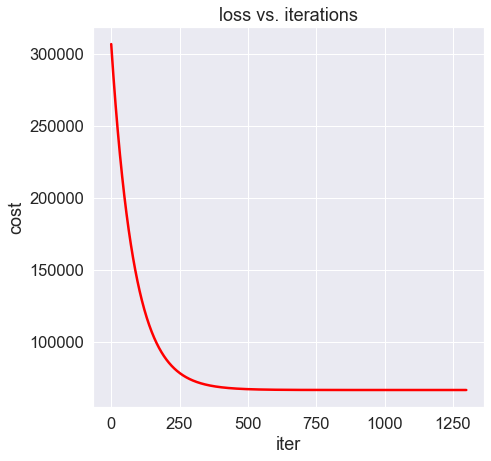

In [15]:
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('iter')
ax.set_ylabel('cost')
ax.set_title('loss vs. iterations')

In [17]:
y_mean=np.mean(y)
y=np.asarray(y)
predicted_y=np.asarray(predicted_y)
n=200
k=2
ss_tot=np.sum((y-y_mean)**2)
ss_res=np.sum((y-predicted_y)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)
print('Adj_R2',1-(   ((n-1)/(n-k-1)) * (1-r2)  ))

R_Squared =  -0.00032873254637011406
Adj_R2 -0.010484354196587109


In [19]:
x=df.drop(columns=['CustomerID','Genre','Spending Score (1-100)'])
x.insert(0,'ones',1)
y=df['Spending Score (1-100)']

x=np.matrix(x.values)
y=np.matrix(y.values)

theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y.T)
print(theta)
y_pred = x.dot(theta)
print(y_pred)

[[ 7.33478522e+01]
 [-6.04787258e-01]
 [ 5.74855922e-03]]
[[61.94312271]
 [60.73354819]
 [61.34408401]
 [59.52972224]
 [54.69717273]
 [60.14025806]
 [52.28377226]
 [59.54121936]
 [34.75069034]
 [55.31345711]
 [32.93632857]
 [52.28952082]
 [38.38516245]
 [58.94792922]
 [51.08569486]
 [60.15750373]
 [52.30101794]
 [61.37282681]
 [42.03113167]
 [52.31251506]
 [52.31826362]
 [58.3661362 ]
 [45.67135234]
 [54.74316121]
 [40.85029995]
 [55.9699814 ]
 [46.29338528]
 [52.34125785]
 [49.32307012]
 [59.60445351]
 [37.23307353]
 [60.81977658]
 [41.48383001]
 [62.65138403]
 [43.90297904]
 [60.83702226]
 [48.1422384 ]
 [55.3996855 ]
 [51.78820763]
 [61.46480376]
 [34.25512571]
 [59.05140328]
 [44.54225765]
 [54.82364104]
 [43.9374704 ]
 [59.05715184]
 [43.3384317 ]
 [57.24853863]
 [56.03896411]
 [54.8293896 ]
 [43.95471607]
 [53.6313122 ]
 [54.84663527]
 [37.91259205]
 [43.35567737]
 [45.17003915]
 [42.75663868]
 [31.87046803]
 [57.28302998]
 [41.55856128]
 [31.27717789]
 [62.12132805]
 [33.0972882

In [20]:
predict_point =theta[0] + 35 * theta[1] + 44 * theta[2]
predict_point

matrix([[52.4332348]])

In [22]:
y_mean=np.mean(y)
y=np.asarray(y)
y_pred=np.asarray(y_pred)
n=200
k=2
ss_tot=np.sum((y[0]-y_mean)**2)
ss_res=np.sum((y[0]-y_pred)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)
print('Adj_R2',1-(   ((n-1)/(n-k-1)) * (1-r2)  ))

R_Squared =  -220.42231765697022
Adj_R2 -222.6702599682085


In [23]:
y_mean=np.mean(y)
y=np.asarray(y)
y_pred=np.asarray(y_pred)
n=200
k=2
ss_tot=np.sum((y[0]-y_mean)**2)
ss_res=np.sum((y[0]-y_pred)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)
print('Adj_R2',1-(   ((n-1)/(n-k-1)) * (1-r2)  ))

R_Squared =  -220.42231765697022
Adj_R2 -222.6702599682085


# Use the sklearn library for multiple regression

In [24]:
x=df.drop(columns=['CustomerID','Genre','Spending Score (1-100)'])
y=df['Spending Score (1-100)']

In [25]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
regressor=model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.10711158828485168


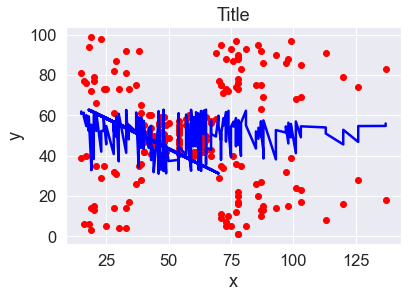

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x['Annual Income (k$)'], y, color = 'red') 
plt.plot(x,regressor.predict(x), color = 'blue') 
plt.title('Title') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

In [27]:
y_pred = model.predict(x)
print('intercept:', model.intercept_)
thetas= model.coef_
print('slope:', thetas)
thetas[1]


intercept: 73.34785222186397
slope: [-0.60478726  0.00574856]


0.005748559223865303

In [28]:
predict_point =35 * thetas[0] + 44 * thetas[1] + model.intercept_
predict_point

52.43323480207328

In [30]:
y_mean=np.mean(y)
y=np.asarray(y)
y_pred=np.asarray(y_pred)
n=200
k=2
ss_tot=np.sum((y[0]-y_mean)**2)
ss_res=np.sum((y[0]-y_pred)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)
print('Adj_R2',1-(   ((n-1)/(n-k-1)) * (1-r2)  ))

R_Squared =  -312.31422362685703
Adj_R2 -315.49507868905863
